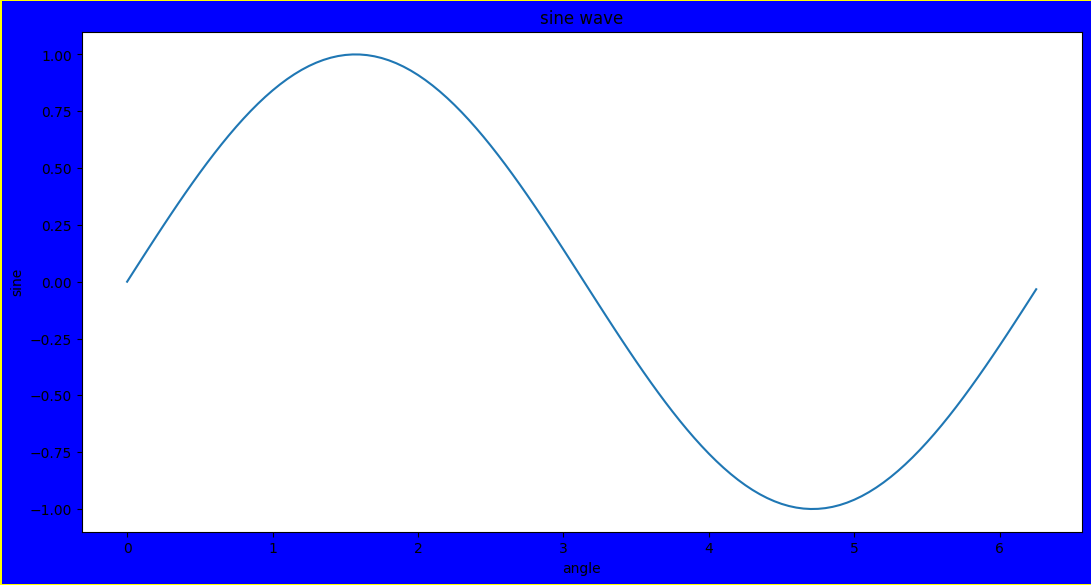

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
fig = plt.figure(figsize=(10,5),facecolor='blue',edgecolor='yellow',linewidth=2)
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
ax.set_title("sine wave")
ax.set_xlabel('angle')
ax.set_ylabel('sine')
plt.show()

In [352]:
yes_bank_df=pd.read_excel('/home/sanjay/yesbank.xlsx')
yes_bank_df.head()

,Unnamed: 0,index,datetime,symbol,open,high,low,close,volume,date,time,Weekdays,Cumulative,TimeBuckets
0,0,0,2023-01-16 09:15:00,BSE:YESBANK,20.45,20.45,20.25,20.40,359172,2023-01-16,09:15:00,0,0,09:20:00
1,1,1,2023-01-16 09:16:00,BSE:YESBANK,20.45,20.50,20.40,20.45,228578,2023-01-16,09:16:00,0,0,09:20:00
2,2,2,2023-01-16 09:17:00,BSE:YESBANK,20.40,20.45,20.35,20.40,147295,2023-01-16,09:17:00,0,0,09:20:00
3,3,3,2023-01-16 09:18:00,BSE:YESBANK,20.40,20.45,20.35,20.45,213347,2023-01-16,09:18:00,0,0,09:20:00
4,4,4,2023-01-16 09:19:00,BSE:YESBANK,20.40,20.45,20.35,20.40,155012,2023-01-16,09:19:00,0,0,09:20:00


In [353]:
yes_bank_df.drop(columns=['Unnamed: 0','index'],inplace=True)

In [354]:
yes_bank_df=yes_bank_df[yes_bank_df['date'].isin(['2023-01-16','2023-01-17','2023-01-18'])]

In [355]:
yes_bank=yes_bank_df.groupby(['date','TimeBuckets'])['close','volume'].sum().reset_index()
yes_bank.head()

/tmp/ipykernel_14763/2863977856.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yes_bank=yes_bank_df.groupby(['date','TimeBuckets'])['close','volume'].sum().reset_index()


,date,TimeBuckets,close,volume
0,2023-01-16,09:20:00,122.35,1393312
1,2023-01-16,09:30:00,202.80,940546
2,2023-01-16,09:40:00,203.20,501076
3,2023-01-16,09:50:00,204.40,1863435
4,2023-01-16,10:00:00,204.40,920261


In [356]:
yes_bank_df

,datetime,symbol,open,high,low,close,volume,date,time,Weekdays,Cumulative,TimeBuckets
0,2023-01-16 09:15:00,BSE:YESBANK,20.45,20.45,20.25,20.40,359172,2023-01-16,09:15:00,0,0,09:20:00
1,2023-01-16 09:16:00,BSE:YESBANK,20.45,20.50,20.40,20.45,228578,2023-01-16,09:16:00,0,0,09:20:00
2,2023-01-16 09:17:00,BSE:YESBANK,20.40,20.45,20.35,20.40,147295,2023-01-16,09:17:00,0,0,09:20:00
3,2023-01-16 09:18:00,BSE:YESBANK,20.40,20.45,20.35,20.45,213347,2023-01-16,09:18:00,0,0,09:20:00
4,2023-01-16 09:19:00,BSE:YESBANK,20.40,20.45,20.35,20.40,155012,2023-01-16,09:19:00,0,0,09:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,2023-01-18 15:25:00,BSE:YESBANK,20.40,20.40,20.35,20.40,76681,2023-01-18,15:25:00,2,2,15:30:00
1121,2023-01-18 15:26:00,BSE:YESBANK,20.40,20.40,20.35,20.35,57109,2023-01-18,15:26:00,2,2,15:30:00
1122,2023-01-18 15:27:00,BSE:YESBANK,20.40,20.40,20.35,20.40,19778,2023-01-18,15:27:00,2,2,15:30:00
1123,2023-01-18 15:28:00,BSE:YESBANK,20.40,20.40,20.35,20.35,27054,2023-01-18,15:28:00,2,2,15:30:00


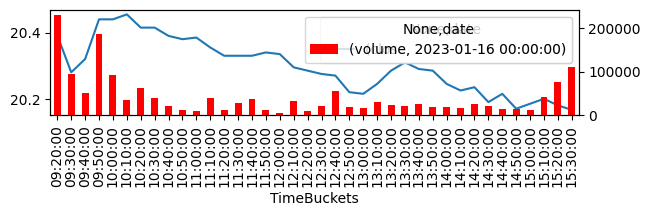

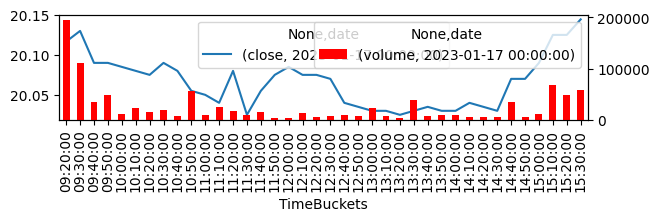

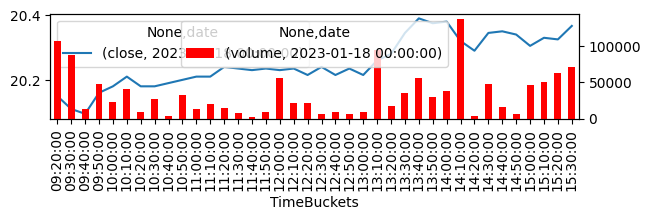

In [370]:
import datetime as dt
import matplotlib.pyplot as plt



df_list=pd.DataFrame(yes_bank_df['date'].unique())

for i in range(len(df_list[0].unique())):

   fig= plt.figure(figsize=(15,3))
   ax = plt.subplot(2,2,2)


   df=yes_bank_df[yes_bank_df['date']==df_list.loc[i][0]]
      
   df.pivot_table(index='TimeBuckets',columns='date',values=['close']).plot(rot=90,ax=ax)
   ax.tick_params(axis='both',labelsize=10)
   ax1 = ax.twinx()
   df.pivot_table(index='TimeBuckets',columns='date',values=['volume']).plot.bar(ax=ax1,color='red')


   



In [349]:
df_list=pd.DataFrame(yes_bank_df['date'].unique())
df_list
for i in range(len(df_list[0].unique())):
    print(df_list.loc[i][0])

2023-01-16 00:00:00
2023-01-17 00:00:00


['09:20:00',
 '09:30:00',
 '09:40:00',
 '09:50:00',
 '10:00:00',
 '10:10:00',
 '10:20:00',
 '10:30:00',
 '10:40:00',
 '10:50:00',
 '11:00:00',
 '11:10:00',
 '11:20:00',
 '11:30:00',
 '11:40:00',
 '11:50:00',
 '12:00:00',
 '12:10:00',
 '12:20:00',
 '12:30:00',
 '12:40:00',
 '12:50:00',
 '13:00:00',
 '13:10:00',
 '13:20:00',
 '13:30:00',
 '13:40:00',
 '13:50:00',
 '14:00:00',
 '14:10:00',
 '14:20:00',
 '14:30:00',
 '14:40:00',
 '14:50:00',
 '15:00:00',
 '15:10:00',
 '15:20:00',
 '15:30:00']